In [1]:
# -------------------------------------------------------------------
# Comment le contexte social d’un individu influe-t-il sur 
# son bonheur ?
# -------------------------------------------------------------------

# DataSet : World Happiness Report of 2019(Happiness scored according 
# to economic production, social support, etc.) 

In [2]:
import pandas as pd
#import numpy as np
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


happiness = pd.read_csv("2019.csv")
print(happiness)

#print(happiness["Country or region"])

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

<Axes: xlabel='Score', ylabel='GDP per capita'>

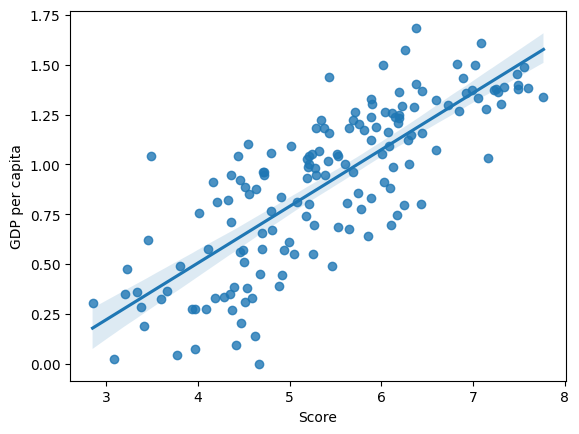

In [3]:
sns.regplot(x=happiness["Score"], y=happiness["GDP per capita"])
# GDP per capita: PIB par habitant

# -------------------------------------------------------------------
# On peut voir que le revenu moyen par habitant correspond plutôt
# bien au score de chaque pays c'est donc un des points important
# du bonheur d'un individu.
# -------------------------------------------------------------------

In [4]:
import json
# with open('C:\Users\yfour\OneDrive\Documents\cours_Ynov\Ydays\Data\DM-Data-Happiness\World.json') as f:
with open('World.json', encoding='utf8') as f:
    WorldMapJson = json.load(f)

# Création du dict principal
WorldMap = {"type": "FeatureCollection", "features": []}
#print(type(WorldMap))

rank = happiness["Overall rank"].values
name = happiness["Country or region"].values
#print(type(name))

nbr = 0 # j'en récupère 132

for i in range (1,len(rank)+1):
    pays = {}
    pays["type"] = "Feature"
    pays["id"] = i
    geo = {}
    for y in range(len(WorldMapJson["features"])):
        if WorldMapJson["features"][y]["properties"]["geounit"] in name[i-1] or name[i-1] in WorldMapJson["features"][y]["properties"]["geounit"]:
            #print(i ,WorldMapJson["features"][y]["properties"]["geounit"])
            pays["name"] = WorldMapJson["features"][y]["properties"]["geounit"]
            pays["geometry"] = WorldMapJson["features"][y]["geometry"]
            WorldMap["features"].append(pays)
   
        
print(WorldMap)  

# Build the choropleth
import plotly.express as px
fig = px.choropleth(happiness, 
    geojson=WorldMap, 
    locations='Overall rank',
    color='Score',
    color_continuous_scale="Viridis",
    range_color=(0, 10),
    #scope="france",
    labels={'Score':'Score'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Improve the legend
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside",
    dtick=5
))

fig.show()

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 1, 'name': 'Finland', 'geometry': {'type': 'Polygon', 'coordinates': [[[28.591929559043194, 69.06477692328666], [28.445943637818658, 68.36461294216404], [29.97742638522061, 67.69829702419275], [29.054588657352326, 66.94428620062206], [30.21765, 65.80598], [29.54442955904699, 64.94867157659048], [30.44468468600371, 64.20445343693909], [30.035872430142717, 63.55281362573855], [31.516092156711125, 62.86768748641289], [31.139991082490894, 62.35769277612441], [30.21110721204445, 61.780027777749694], [28.07, 60.50352], [28.070001921525666, 60.50351912796823], [28.069997592895277, 60.50351654727584], [26.255172967236973, 60.4239606797625], [24.496623976344523, 60.05731639265166], [22.869694858499457, 59.846373196036225], [22.290763787533592, 60.39192129174154], [21.322244093519316, 60.720169989659524], [21.544866163832694, 61.70532949487179], [21.05921105315369, 62.60739329695874], [21.536029493910803, 63.18973501245587], [2

<Axes: >

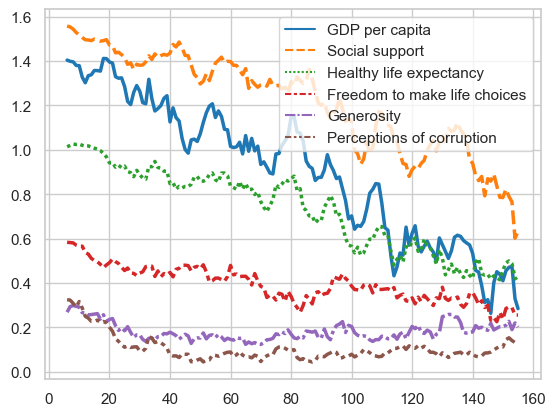

In [5]:
sns.set_theme(style="whitegrid")
data = pd.DataFrame(happiness, columns=["GDP per capita", "Social support", "Healthy life expectancy","Freedom to make life choices","Generosity", "Perceptions of corruption"])
data = data.rolling(7).mean()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<Axes: >

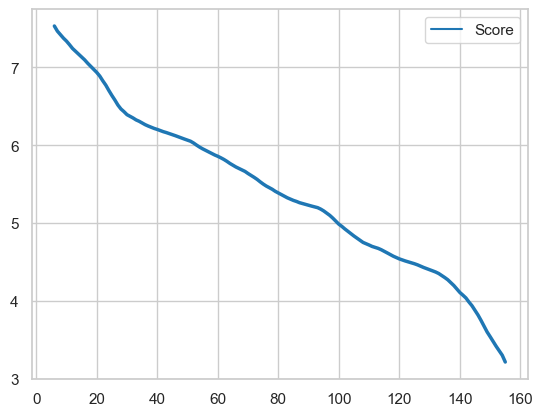

In [6]:
sns.set_theme(style="whitegrid")
score = pd.DataFrame(happiness, columns=["Score"])
score = score.rolling(7).mean()
sns.lineplot(data=score, palette="tab10", linewidth=2.5)

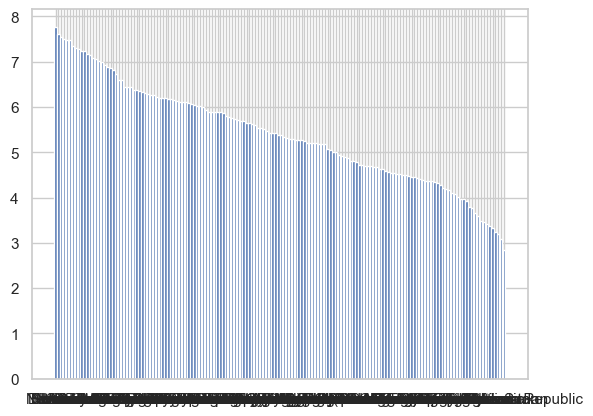

In [7]:
y_pos = np.arange(len(happiness["Country or region"]))
plt.bar(y_pos,happiness["Score"])
plt.xticks(y_pos, happiness["Country or region"])
plt.show()